In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input/turkey-earthquake-data-1914-2023'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

data_dir = '/kaggle/input/turkey-earthquake-data-1914-2023'


data_file = 'veriler.csv'


data_path = os.path.join(data_dir, data_file)
        



/kaggle/input/turkey-earthquake-data-1914-2023/veriler.csv


In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import geopandas as gpd
from shapely.geometry import Point
import plotly.express as px 
import re
import datetime 
import plotly.graph_objects as go
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500) 

color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

## DATA ANALYSİS

In [3]:
data = pd.read_csv(data_path, parse_dates=["Olus tarihi"])

data["Olus tarihi"] = pd.to_datetime(data["Olus tarihi"]) 

data.set_index("Olus tarihi", inplace=True) 

data.index.name = None  
data.head(25)

No         Deprem Kodu  Olus zamani  Enlem  Boylam  Der(km)    xM    MD    ML    Mw    Ms    Mb Tip                                                Yer
2023-07-31       1  20230731215338  21:53:38.29 37.415  37.170    4.000 3.500 0.000 3.500 3.400 0.000 0.000  Ke     DOGANLI-PAZARCIK (KAHRAMANMARAS) [East 1.3 km]
2023-07-31       2  20230731152316  15:23:16.85 38.141  38.434    5.200 3.500 0.000 3.500 3.400 0.000 0.000  Ke               AKSU-SINCIK (ADIYAMAN) [West 6.4 km]
2023-07-31       3  20230731025049  02:50:49.84 37.835  26.835    6.200 3.000 0.000 3.000 0.000 0.000 0.000  Ke                           SISAM ADASI (EGE DENIZI)
2023-07-30       4  20230730201940  20:19:40.49 40.809  31.018    5.300 3.100 0.000 3.100 3.100 0.000 0.000  Ke       ICMELER-GOLYAKA (DUZCE) [South East  0.7 km]
2023-07-30       5  20230730161352  16:13:52.62 38.129  38.186    2.400 3.000 0.000 3.000 0.000 0.000 0.000  Ke  CAMPINAR-CELIKHAN (ADIYAMAN) [North West  4.3 km]
2023-07-30       6  20230730151316  15:13:16.85 36.273  35.872    4.400 3.700 0.000 3.600 3.700 0.000 0.000  Ke            KALE-ARSUZ (HATAY) [South East  7.4 km]
2023-07-30       7  20230730135451  13:54:51.96 40.572  30.730    2.100 3.000 0.000 3.000 2.900 0.000 0.000  Ke     KAYABASI-AKYAZI (SAKARYA) [North East  0.6 km]
2023-07-29       8  20230729212103  21:21:03.22 37.983  36.268    5.200 3.000 0.000 3.000 3.000 0.000 0.000  Ke  KAZANDERE-GOKSUN (KAHRAMANMARAS) [North West  ...
2023-07-29       9  20230729211549  21:15:49.12 37.639  34.742    5.600 3.000 0.000 3.000 2.900 0.000 0.000  Ke     BASMAKCI-ULUKISLA (NIGDE) [South East  2.9 km]
2023-07-29      10  20230729185334  18:53:34.40 37.589  35.917    5.000 3.000 0.000 3.000 0.000 0.000 0.000  Ke        MINNETLI-KOZAN (ADANA) [South West  3.1 km]
2023-07-29      11  20230729114218  11:42:18.99 38.195  26.392   13.400 3.100 0.000 3.100 0.000 0.000 0.000  Ke                  CESME ACIKLARI-IZMIR (EGE DENIZI)
2023-07-29      12  20230729102010  10:20:10.03 38.502  40.263    5.000 3.000 0.000 3.000 0.000 0.000 0.000  Ke        UCOCAK-ARICAK (ELAZIG) [North East  3.0 km]
2023-07-29      13  20230729100933  10:09:33.70 36.905  27.291    9.100 3.200 0.000 3.200 0.000 0.000 0.000  Ke                                KOS ADASI (AKDENIZ)
2023-07-29      14  20230729060304  06:03:04.23 38.256  37.305    7.700 3.000 0.000 3.000 0.000 0.000 0.000  Ke  SOGUTLU-ELBISTAN (KAHRAMANMARAS) [North East  ...
2023-07-29      15  20230729053344  05:33:44.97 36.061  31.463   19.900 3.300 0.000 3.300 0.000 0.000 0.000  Ke                                            AKDENIZ
2023-07-28      16  20230728215900  21:59:00.28 38.054  37.136    5.000 3.300 0.000 3.300 3.300 0.000 0.000  Ke  CIFTLIKKALE-EKINOZU (KAHRAMANMARAS) [North 4.3...
2023-07-28      17  20230728173855  17:38:55.96 38.510  40.284    5.000 3.900 0.000 3.700 3.900 0.000 0.000  Ke         CAYBASI-GENC (BINGOL) [South West  2.5 km]
2023-07-27      18  20230727083251  08:32:51.34 40.785  27.811    7.200 3.300 0.000 3.200 3.300 0.000 0.000  Ke                                     MARMARA DENIZI
2023-07-27      19  20230727062904  06:29:04.68 37.669  35.854    5.000 3.400 0.000 3.400 3.400 0.000 0.000  Ke      CULLUUSAGI-KOZAN (ADANA) [South West  2.4 km]
2023-07-27      20  20230727053826  05:38:26.29 36.052  36.062   23.200 3.700 0.000 3.600 3.700 0.000 0.000  Ke         KARACURUN-YAYLADAGI (HATAY) [North 2.6 km]
2023-07-26      21  20230726162515  16:25:15.01 38.084  36.913    2.000 3.600 0.000 3.600 3.600 0.000 0.000  Ke        ERICEK-GOKSUN (KAHRAMANMARAS) [East 3.0 km]
2023-07-26      22  20230726134410  13:44:10.95 38.328  37.206    1.700 3.200 0.000 3.100 3.200 0.000 0.000  Ke  EVCIHUYUK-ELBISTAN (KAHRAMANMARAS) [South West...
2023-07-26      23  20230726105519  10:55:19.28 37.518  35.927    5.000 4.000 0.000 3.900 4.000 0.000 0.000  Ke        FERHATLI-KOZAN (ADANA) [North East  2.1 km]
2023-07-26      24  20230726030231  03:02:31.70 38.008  37.969   21.200 3.200 0.000 3.200 3.200 0.00

In [4]:
def check_data(dataframe,head=5):
    print(20*"-" + "Information".center(20) + 20*"-")
    print(dataframe.info())
    print(20*"-" + "Data Shape".center(20) + 20*"-")
    print(dataframe.shape)
    print("\n" + 20*"-" + "The First 5 Data".center(20) + 20*"-")
    print(dataframe.head())
    print("\n" + 20 * "-" + "The Last 5 Data".center(20) + 20 * "-")
    print(dataframe.tail())
    print("\n" + 20 * "-" + "Missing Values".center(20) + 20 * "-")
    print(dataframe.isnull().sum())
    print("\n" + 40 * "-" + "Describe the Data".center(40) + 40 * "-")
    print(dataframe.describe([0.01, 0.05, 0.10, 0.50, 0.75, 0.90, 0.95, 0.99]).T)

check_data(data)

--------------------    Information     --------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50000 entries, 2023-07-31 to 1994-09-11
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   No           50000 non-null  int64  
 1   Deprem Kodu  50000 non-null  int64  
 2   Olus zamani  50000 non-null  object 
 3   Enlem        50000 non-null  float64
 4   Boylam       50000 non-null  float64
 5   Der(km)      50000 non-null  float64
 6   xM           50000 non-null  float64
 7   MD           50000 non-null  float64
 8   ML           50000 non-null  float64
 9   Mw           12922 non-null  float64
 10  Ms           50000 non-null  float64
 11  Mb           50000 non-null  float64
 12  Tip          50000 non-null  object 
 13  Yer          50000 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 5.7+ MB
None
--------------------     Data Shape     --------------------
(50000, 14)



In [5]:
data.nunique()

No             50000
Deprem Kodu    50000
Olus zamani    49746
Enlem          20622
Boylam         28384
Der(km)          921
xM                42
MD                37
ML                45
Mw                46
Ms                12
Mb                24
Tip                2
Yer            33489
dtype: int64

In [6]:
data.isnull().sum()

No                 0
Deprem Kodu        0
Olus zamani        0
Enlem              0
Boylam             0
Der(km)            0
xM                 0
MD                 0
ML                 0
Mw             37078
Ms                 0
Mb                 0
Tip                0
Yer                0
dtype: int64

In [7]:
data.fillna(0, inplace=True)

In [8]:
## ENLEM VE BOYLAM SÜTUNLARINDAN coğrafi koordinatları oluşturur ve bu koordinatları GeoPandas GeoDataFrame olarak dönüştürdük.

data['Koordinatlar'] = data['Enlem'].astype(str) + ', ' + data['Boylam'].astype(str)


geometry = data['Koordinatlar'].apply(lambda x: Point([float(coord) for coord in x.split(',')]))


gdf = gpd.GeoDataFrame(data, geometry=geometry)

gdf.drop(columns=['Enlem'], inplace=True) # artık gerekli olmayan sütünları drop ettik.
gdf.drop(columns=['Boylam'], inplace=True)
gdf.drop(columns=['Deprem Kodu'], inplace=True)
gdf.drop(columns=['Olus zamani'], inplace=True)

In [9]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
DatetimeIndex: 50000 entries, 2023-07-31 to 1994-09-11
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   No            50000 non-null  int64   
 1   Der(km)       50000 non-null  float64 
 2   xM            50000 non-null  float64 
 3   MD            50000 non-null  float64 
 4   ML            50000 non-null  float64 
 5   Mw            50000 non-null  float64 
 6   Ms            50000 non-null  float64 
 7   Mb            50000 non-null  float64 
 8   Tip           50000 non-null  object  
 9   Yer           50000 non-null  object  
 10  Koordinatlar  50000 non-null  object  
 11  geometry      50000 non-null  geometry
dtypes: float64(7), geometry(1), int64(1), object(3)
memory usage: 5.0+ MB


In [10]:
gdf.head(25)

No      Der(km)    xM    MD    ML    Mw    Ms    Mb Tip                                                Yer      Koordinatlar                   geometry
2023-07-31       1    4.000 3.500 0.000 3.500 3.400 0.000 0.000  Ke     DOGANLI-PAZARCIK (KAHRAMANMARAS) [East 1.3 km]  37.4153, 37.1703  POINT (37.41530 37.17030)
2023-07-31       2    5.200 3.500 0.000 3.500 3.400 0.000 0.000  Ke               AKSU-SINCIK (ADIYAMAN) [West 6.4 km]   38.1413, 38.434  POINT (38.14130 38.43400)
2023-07-31       3    6.200 3.000 0.000 3.000 0.000 0.000 0.000  Ke                           SISAM ADASI (EGE DENIZI)  37.8352, 26.8353  POINT (37.83520 26.83530)
2023-07-30       4    5.300 3.100 0.000 3.100 3.100 0.000 0.000  Ke       ICMELER-GOLYAKA (DUZCE) [South East  0.7 km]  40.8085, 31.0183  POINT (40.80850 31.01830)
2023-07-30       5    2.400 3.000 0.000 3.000 0.000 0.000 0.000  Ke  CAMPINAR-CELIKHAN (ADIYAMAN) [North West  4.3 km]   38.129, 38.1863  POINT (38.12900 38.18630)
2023-07-30       6    4.400 3.700 0.000 3.600 3.700 0.000 0.000  Ke            KALE-ARSUZ (HATAY) [South East  7.4 km]  36.2735, 35.8717  POINT (36.27350 35.87170)
2023-07-30       7    2.100 3.000 0.000 3.000 2.900 0.000 0.000  Ke     KAYABASI-AKYAZI (SAKARYA) [North East  0.6 km]  40.5722, 30.7302  POINT (40.57220 30.73020)
2023-07-29       8    5.200 3.000 0.000 3.000 3.000 0.000 0.000  Ke  KAZANDERE-GOKSUN (KAHRAMANMARAS) [North West  ...  37.9832, 36.2683  POINT (37.98320 36.26830)
2023-07-29       9    5.600 3.000 0.000 3.000 2.900 0.000 0.000  Ke     BASMAKCI-ULUKISLA (NIGDE) [South East  2.9 km]  37.6385, 34.7417  POINT (37.63850 34.74170)
2023-07-29      10    5.000 3.000 0.000 3.000 0.000 0.000 0.000  Ke        MINNETLI-KOZAN (ADANA) [South West  3.1 km]   37.5888, 35.917  POINT (37.58880 35.91700)
2023-07-29      11   13.400 3.100 0.000 3.100 0.000 0.000 0.000  Ke                  CESME ACIKLARI-IZMIR (EGE DENIZI)  38.1948, 26.3918  POINT (38.19480 26.39180)
2023-07-29      12    5.000 3.000 0.000 3.000 0.000 0.000 0.000  Ke        UCOCAK-ARICAK (ELAZIG) [North East  3.0 km]   38.502, 40.2627  POINT (38.50200 40.26270)
2023-07-29      13    9.100 3.200 0.000 3.200 0.000 0.000 0.000  Ke                                KOS ADASI (AKDENIZ)   36.9048, 27.291  POINT (36.90480 27.29100)
2023-07-29      14    7.700 3.000 0.000 3.000 0.000 0.000 0.000  Ke  SOGUTLU-ELBISTAN (KAHRAMANMARAS) [North East  ...  38.2562, 37.3048  POINT (38.25620 37.30480)
2023-07-29      15   19.900 3.300 0.000 3.300 0.000 0.000 0.000  Ke                                            AKDENIZ  36.0613, 31.4633  POINT (36.06130 31.46330)
2023-07-28      16    5.000 3.300 0.000 3.300 3.300 0.000 0.000  Ke  CIFTLIKKALE-EKINOZU (KAHRAMANMARAS) [North 4.3...   38.054, 37.1362  POINT (38.05400 37.13620)
2023-07-28      17    5.000 3.900 0.000 3.700 3.900 0.000 0.000  Ke         CAYBASI-GENC (BINGOL) [South West  2.5 km]  38.5095, 40.2842  POINT (38.50950 40.28420)
2023-07-27      18    7.200 3.300 0.000 3.200 3.300 0.000 0.000  Ke                                     MARMARA DENIZI  40.7848, 27.8105  POINT (40.78480 27.81050)
2023-07-27      19    5.000 3.400 0.000 3.400 3.400 0.000 0.000  Ke      CULLUUSAGI-KOZAN (ADANA) [South West  2.4 km]  37.6695, 35.8542  POINT (37.66950 35.85420)
2023-07-27      20   23.200 3.700 0.000 3.600 3.700 0.000 0.000  Ke         KARACURUN-YAYLADAGI (HATAY) [North 2.6 km]  36.0522, 36.0625  POINT (36.05220 36.06250)
2023-07-26      21    2.000 3.600 0.000 3.600 3.600 0.000 0.000  Ke        ERICEK-GOKSUN (KAHRAMANMARAS) [East 3.0 km]  38.0843, 36.9128  POINT (38.08430 36.91280)
2023-07-26      22    1.700 3.200 0.000 3.100 3.200 0.000 0.000  Ke  EVCIHUYUK-ELBISTAN (KAHRAMANMARAS) [South West...  38.3282, 37.2058  POINT (38.32820 37.20580)
2023-07-26      23    5.000 4.000 0.000 3.900 4.000 0.000 0.000  Ke        FERHATLI-KOZAN (ADANA) [North East  2.1 km]   37.5178, 35.927  POINT (37.51780 35.92700)
2023-07-26      24   21.200 3.200 0.000 3.200 3.200 0.000 0.000  Ke         

In [11]:
# yer sütünunda sadece parentez içinde olan ilçe ismini kullanmamı yeterli. 
# Parantez içindeki ifadeyi almak için bir regex deseni kullandık.
pattern = r"\((.*?)\)"


gdf['Yer'] = gdf['Yer'].apply(lambda x: re.search(pattern, x).group(1) if re.search(pattern, x) else x)

In [12]:
gdf.head(25)

No      Der(km)    xM    MD    ML    Mw    Ms    Mb Tip             Yer      Koordinatlar                   geometry
2023-07-31       1    4.000 3.500 0.000 3.500 3.400 0.000 0.000  Ke   KAHRAMANMARAS  37.4153, 37.1703  POINT (37.41530 37.17030)
2023-07-31       2    5.200 3.500 0.000 3.500 3.400 0.000 0.000  Ke        ADIYAMAN   38.1413, 38.434  POINT (38.14130 38.43400)
2023-07-31       3    6.200 3.000 0.000 3.000 0.000 0.000 0.000  Ke      EGE DENIZI  37.8352, 26.8353  POINT (37.83520 26.83530)
2023-07-30       4    5.300 3.100 0.000 3.100 3.100 0.000 0.000  Ke           DUZCE  40.8085, 31.0183  POINT (40.80850 31.01830)
2023-07-30       5    2.400 3.000 0.000 3.000 0.000 0.000 0.000  Ke        ADIYAMAN   38.129, 38.1863  POINT (38.12900 38.18630)
2023-07-30       6    4.400 3.700 0.000 3.600 3.700 0.000 0.000  Ke           HATAY  36.2735, 35.8717  POINT (36.27350 35.87170)
2023-07-30       7    2.100 3.000 0.000 3.000 2.900 0.000 0.000  Ke         SAKARYA  40.5722, 30.7302  POINT (40.57220 30.73020)
2023-07-29       8    5.200 3.000 0.000 3.000 3.000 0.000 0.000  Ke   KAHRAMANMARAS  37.9832, 36.2683  POINT (37.98320 36.26830)
2023-07-29       9    5.600 3.000 0.000 3.000 2.900 0.000 0.000  Ke           NIGDE  37.6385, 34.7417  POINT (37.63850 34.74170)
2023-07-29      10    5.000 3.000 0.000 3.000 0.000 0.000 0.000  Ke           ADANA   37.5888, 35.917  POINT (37.58880 35.91700)
2023-07-29      11   13.400 3.100 0.000 3.100 0.000 0.000 0.000  Ke      EGE DENIZI  38.1948, 26.3918  POINT (38.19480 26.39180)
2023-07-29      12    5.000 3.000 0.000 3.000 0.000 0.000 0.000  Ke          ELAZIG   38.502, 40.2627  POINT (38.50200 40.26270)
2023-07-29      13    9.100 3.200 0.000 3.200 0.000 0.000 0.000  Ke         AKDENIZ   36.9048, 27.291  POINT (36.90480 27.29100)
2023-07-29      14    7.700 3.000 0.000 3.000 0.000 0.000 0.000  Ke   KAHRAMANMARAS  38.2562, 37.3048  POINT (38.25620 37.30480)
2023-07-29      15   19.900 3.300 0.000 3.300 0.000 0.000 0.000  Ke         AKDENIZ  36.0613, 31.4633  POINT (36.06130 31.46330)
2023-07-28      16    5.000 3.300 0.000 3.300 3.300 0.000 0.000  Ke   KAHRAMANMARAS   38.054, 37.1362  POINT (38.05400 37.13620)
2023-07-28      17    5.000 3.900 0.000 3.700 3.900 0.000 0.000  Ke          BINGOL  38.5095, 40.2842  POINT (38.50950 40.28420)
2023-07-27      18    7.200 3.300 0.000 3.200 3.300 0.000 0.000  Ke  MARMARA DENIZI  40.7848, 27.8105  POINT (40.78480 27.81050)
2023-07-27      19    5.000 3.400 0.000 3.400 3.400 0.000 0.000  Ke           ADANA  37.6695, 35.8542  POINT (37.66950 35.85420)
2023-07-27      20   23.200 3.700 0.000 3.600 3.700 0.000 0.000  Ke           HATAY  36.0522, 36.0625  POINT (36.05220 36.06250)
2023-07-26      21    2.000 3.600 0.000 3.600 3.600 0.000 0.000  Ke   KAHRAMANMARAS  38.0843, 36.9128  POINT (38.08430 36.91280)
2023-07-26      22    1.700 3.200 0.000 3.100 3.200 0.000 0.000  Ke   KAHRAMANMARAS  38.3282, 37.2058  POINT (38.32820 37.20580)
2023-07-26      23    5.000 4.000 0.000 3.900 4.000 0.000 0.000  Ke           ADANA   37.5178, 35.927  POINT (37.51780 35.92700)
2023-07-26      24   21.200 3.200 0.000 3.200 3.200 0.000 0.000  Ke         MALATYA   38.0078, 37.969  POINT (38.00780 37.96900)
2023-07-26      25    5.000 3.800 0.000 3.700 3.800 0.000 0.000  Ke         ERZURUM   40.4275, 41.347  POINT (40.42750 41.34700)

In [13]:
# Deprem ve Türkiyenin bölgeleri analizi için bölgeler dictionarysi oluşturduk.

bolge_dict = {
    'Marmara': ['ISTANBUL', 'KOCAELI', 'BURSA', 'BALIKESIR', 'CANAKKALE', 'EDIRNE', 'KIRKLARELI', 'TEKIRDAG', 'YALOVA',"MARMARA DENIZI","SAKARYA"],
    'Ege': ['IZMIR', 'AYDIN', 'MANISA', 'MUGLA', 'AFYONKARAHISAR', 'DENIZLI', 'USAK', 'KUTAHYA',"EGE DENIZI"],
    'Akdeniz': ['ANTALYA', 'MERSIN', 'ADANA', 'HATAY', 'ISPARTA', 'BURDUR', 'OSMANIYE', 'KAHRAMANMARAS', 'MERSIN',"AKDENIZ"],
    'Karadeniz': ['TRABZON', 'SAMSUN', 'ORDU', 'RIZE', 'GIRESUN', 'SINOP', 'AMASYA', 'TOKAT', 'BARTIN', 'KASTAMONU', 'ZONGULDAK', 'DUZCE',"CORUM","ARTVIN","BAYBURT","GUMUSHANE","KARADENIZ"],
    'Ic Anadolu': ['ANKARA', 'KONYA', 'AKSARAY', 'NEVSEHIR', 'KAYSERI', 'KIRSEHIR', 'YOZGAT', 'KARAMAN', 'SIVAS', 'KIRIKKALE',"NIGDE","CANKIRI"],
    'Guneydogu Anadolu': ['DIYARBAKIR', 'SANLIURFA', 'ADIYAMAN', 'BATMAN', 'MARDIN', 'SIIRT', 'SIRNAK', 'KILIS', 'GAZIANTEP', 'HAKKARI'],
    'Dogu Anadolu': ['VAN', 'AGRI', 'IGDIR', 'KARS', 'ERZURUM', 'ERZINCAN', 'BINGOL', 'TUNCELI', 'MUS', 'BITLIS', 'ARDAHAN', 'MALATYA', 'ELAZIG']
}



gdf['Bolge'] = gdf['Yer'].apply(lambda il: next((bolge for bolge, iller in bolge_dict.items() if il in iller), None))

In [14]:
def ilin_bolgesini_bul(il_adi):
    for bolge, iller in bolge_dict.items():
        if il_adi in iller:
            return bolge
    return 'Bilinmeyen'  # Eğer il listede yoksa 'bilinmeyen' demek bu veride türkiye sınır ve ve türkiye bölgesi olmayan yerler demek.

gdf['Bolge'] = gdf['Yer'].apply(lambda x: ilin_bolgesini_bul(x.split('-')[-1].strip()))

In [15]:
data_bolge = gdf.groupby('Bolge')

In [16]:
for name, group in data_bolge:
    print(f'Bölge Adı: {name}, Boyutlar: {group.shape}')

Bölge Adı: Akdeniz, Boyutlar: (12454, 13)
Bölge Adı: Bilinmeyen, Boyutlar: (5006, 13)
Bölge Adı: Dogu Anadolu, Boyutlar: (9655, 13)
Bölge Adı: Ege, Boyutlar: (12887, 13)
Bölge Adı: Guneydogu Anadolu, Boyutlar: (1923, 13)
Bölge Adı: Ic Anadolu, Boyutlar: (2838, 13)
Bölge Adı: Karadeniz, Boyutlar: (1778, 13)
Bölge Adı: Marmara, Boyutlar: (3459, 13)


In [17]:
data_bolge.head()

No      Der(km)    xM    MD    ML    Mw    Ms    Mb Tip                          Yer      Koordinatlar                   geometry              Bolge
2023-07-31       1    4.000 3.500 0.000 3.500 3.400 0.000 0.000  Ke                KAHRAMANMARAS  37.4153, 37.1703  POINT (37.41530 37.17030)            Akdeniz
2023-07-31       2    5.200 3.500 0.000 3.500 3.400 0.000 0.000  Ke                     ADIYAMAN   38.1413, 38.434  POINT (38.14130 38.43400)  Guneydogu Anadolu
2023-07-31       3    6.200 3.000 0.000 3.000 0.000 0.000 0.000  Ke                   EGE DENIZI  37.8352, 26.8353  POINT (37.83520 26.83530)                Ege
2023-07-30       4    5.300 3.100 0.000 3.100 3.100 0.000 0.000  Ke                        DUZCE  40.8085, 31.0183  POINT (40.80850 31.01830)          Karadeniz
2023-07-30       5    2.400 3.000 0.000 3.000 0.000 0.000 0.000  Ke                     ADIYAMAN   38.129, 38.1863  POINT (38.12900 38.18630)  Guneydogu Anadolu
2023-07-30       6    4.400 3.700 0.000 3.600 3.700 0.000 0.000  Ke                        HATAY  36.2735, 35.8717  POINT (36.27350 35.87170)            Akdeniz
2023-07-30       7    2.100 3.000 0.000 3.000 2.900 0.000 0.000  Ke                      SAKARYA  40.5722, 30.7302  POINT (40.57220 30.73020)            Marmara
2023-07-29       8    5.200 3.000 0.000 3.000 3.000 0.000 0.000  Ke                KAHRAMANMARAS  37.9832, 36.2683  POINT (37.98320 36.26830)            Akdeniz
2023-07-29       9    5.600 3.000 0.000 3.000 2.900 0.000 0.000  Ke                        NIGDE  37.6385, 34.7417  POINT (37.63850 34.74170)         Ic Anadolu
2023-07-29      10    5.000 3.000 0.000 3.000 0.000 0.000 0.000  Ke                        ADANA   37.5888, 35.917  POINT (37.58880 35.91700)            Akdeniz
2023-07-29      11   13.400 3.100 0.000 3.100 0.000 0.000 0.000  Ke                   EGE DENIZI  38.1948, 26.3918  POINT (38.19480 26.39180)                Ege
2023-07-29      12    5.000 3.000 0.000 3.000 0.000 0.000 0.000  Ke                       ELAZIG   38.502, 40.2627  POINT (38.50200 40.26270)       Dogu Anadolu
2023-07-29      13    9.100 3.200 0.000 3.200 0.000 0.000 0.000  Ke                      AKDENIZ   36.9048, 27.291  POINT (36.90480 27.29100)            Akdeniz
2023-07-28      17    5.000 3.900 0.000 3.700 3.900 0.000 0.000  Ke                       BINGOL  38.5095, 40.2842  POINT (38.50950 40.28420)       Dogu Anadolu
2023-07-27      18    7.200 3.300 0.000 3.200 3.300 0.000 0.000  Ke               MARMARA DENIZI  40.7848, 27.8105  POINT (40.78480 27.81050)            Marmara
2023-07-26      24   21.200 3.200 0.000 3.200 3.200 0.000 0.000  Ke                      MALATYA   38.0078, 37.969  POINT (38.00780 37.96900)       Dogu Anadolu
2023-07-26      25    5.000 3.800 0.000 3.700 3.800 0.000 0.000  Ke                      ERZURUM   40.4275, 41.347  POINT (40.42750 41.34700)       Dogu Anadolu
2023-07-26      26   11.000 3.100 0.000 3.000 3.100 0.000 0.000  Ke                      MALATYA  38.0183, 38.0165  POINT (38.01830 38.01650)       Dogu Anadolu
2023-07-26      27    8.700 3.700 0.000 3.600 3.700 0.000 0.000  Ke                     ADIYAMAN  38.0327, 38.5623  POINT (38.03270 38.56230)  Guneydogu Anadolu
2023-07-21      55    8.700 3.200 0.000 3.200 0.000 0.000 0.000  Ke                       SURIYE   35.095, 36.5892  POINT (35.09500 36.58920)         Bilinmeyen
2023-07-20      58   13.400 4.200 0.000 4.200 4.000 0.000 0.000  Ke                   EGE DENIZI  37.7382, 27.1395  POINT (37.73820 27.13950)                Ege
2023-07-18      64    5.000 3.000 0.000 3.000 0.000 0.000 0.000  Ke                        SIVAS  38.8523, 37.4163  POINT (38.85230 37.41630)         Ic Anadolu
2023-07-17      67    5.300 3.200 0.000 3.200 3.100 0.000 0.000  Ke                    GAZIANTEP  37.1773, 36.7678  POINT (37.17730 36.76780)  Guneydogu Anadolu
2023-07-16      71    5.400 3.000 0.000 3.000 3.000 0.000 0.000  Ke                      KAYSERI  37.7573, 35.4157  POINT (37.75730 35.41570)       

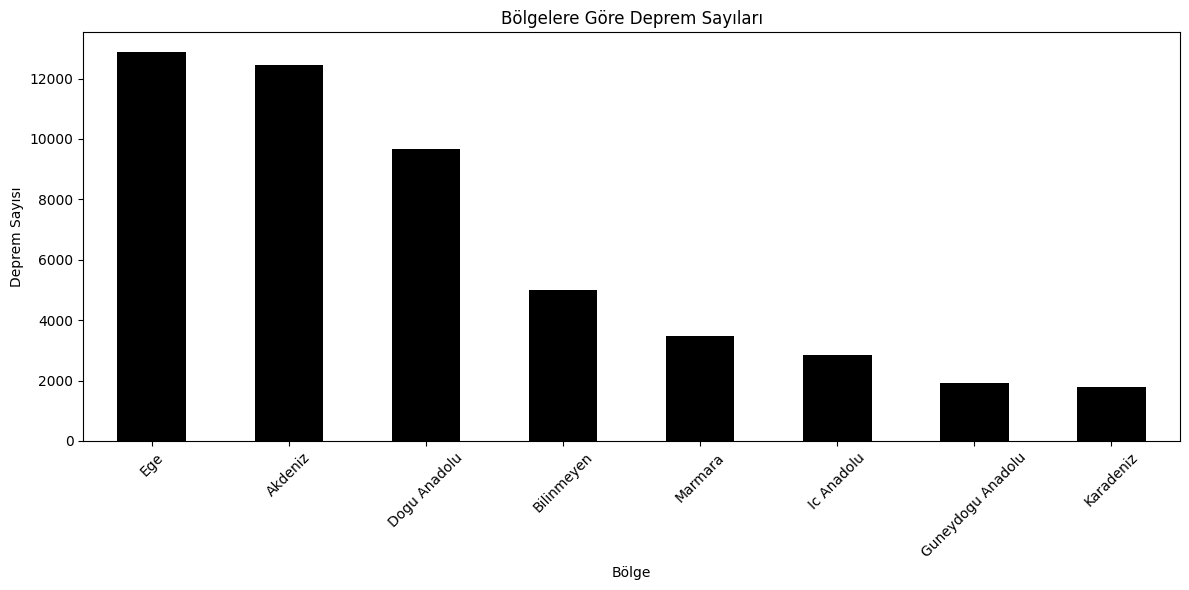

In [18]:
deprem_sayilari = data_bolge['Bolge'].value_counts()


deprem_sayilari = deprem_sayilari.sort_values(ascending=False)


plt.figure(figsize=(12, 6))
deprem_sayilari.plot(kind='bar', color='black')
plt.title('Bölgelere Göre Deprem Sayıları')
plt.xlabel('Bölge')
plt.ylabel('Deprem Sayısı')
plt.xticks(rotation=45)  


plt.tight_layout()
plt.show()

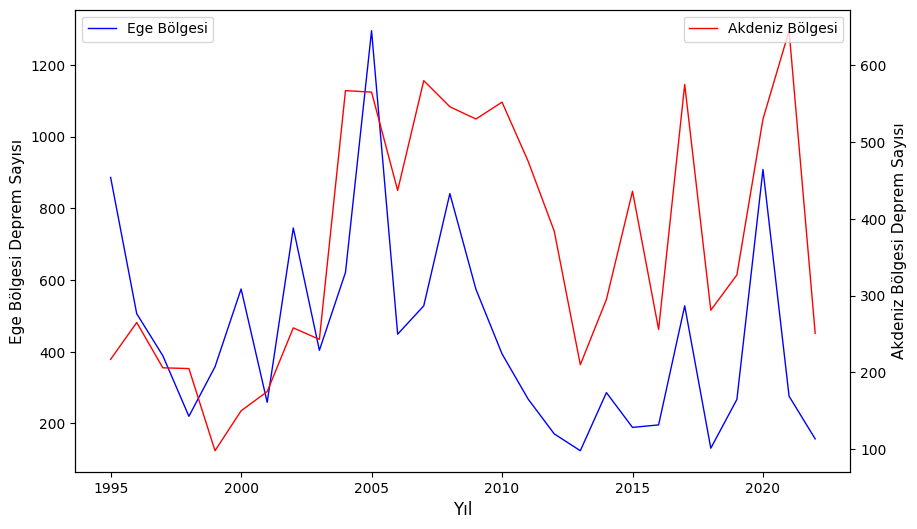

In [19]:

ege_depremleri = gdf[(gdf['Bolge'] == 'Ege') & (gdf.index >= '1995-01-01') & (gdf.index < '2023-01-01')]
akdeniz_depremleri = gdf[(gdf['Bolge'] == 'Akdeniz') & (gdf.index >= '1995-01-01') & (gdf.index < '2023-01-01')]

# Ege bölgesinin 1995-2023 yılları arasındaki deprem sayıları
ege_deprem_sayilari = ege_depremleri.groupby(ege_depremleri.index.year)['Bolge'].count()

# Akdeniz bölgesinin 1995-2023 yılları arasındaki deprem sayıları
akdeniz_deprem_sayilari = akdeniz_depremleri.groupby(akdeniz_depremleri.index.year)['Bolge'].count()


fig, ax = plt.subplots(figsize=(10, 6))
ax2 = ax.twinx()


ege_deprem_sayilari.plot(ax=ax, label="Ege Bölgesi", color='b', linewidth=1)


akdeniz_deprem_sayilari.plot(ax=ax2, label="Akdeniz Bölgesi", color='r', linewidth=1)


ax.set_xlabel("Yıl", fontsize=12, fontweight='light')
ax.set_ylabel("Ege Bölgesi Deprem Sayısı", fontsize=11, fontweight='light', color='black')
ax2.set_ylabel("Akdeniz Bölgesi Deprem Sayısı", fontsize=11, fontweight='light', color='black')


ax.legend(loc="upper left")
ax2.legend(loc="upper right")


plt.show()


In [20]:
#( xM değeri 3.1'den büyük olanları alalım)
filtered_data = gdf[gdf['xM'] >= 3.4]


fig = px.scatter_geo(
    filtered_data,
    lat=filtered_data.geometry.x,  # enlem değerleri
    lon=filtered_data.geometry.y,  # boylam değerleri
    color='xM',
    scope='asia',  # asia world europe 
    color_continuous_scale='Reds',
    hover_name='Yer',
    fitbounds='locations',
    basemap_visible=True,
    opacity=0.5
)


fig.update_layout(autosize=True)


fig.show()

# **Number of Earthquakes due to Location**

In [21]:
Yer_count = data.groupby(pd.Grouper(key='Yer')).size().reset_index(name='count')
fig = px.treemap(Yer_count, path=['Yer'], values='count')
fig.update_layout(title_text='Number of Earthquakes due to Location',
                  title_x=0.5, title_font=dict(size=30)
                  )
fig.update_traces(textinfo="label+value")
fig.show()

# **Top 10 Frequent Earthquake Locations**

In [22]:
Yer_count = data.groupby(pd.Grouper(key='Yer')).size().reset_index(name='count')
Yer_count_top = Yer_count.nlargest(10, 'count')[['Yer', 'count']]
fig = px.bar(Yer_count_top, x='Yer', y='count', color='Yer', text='count')
fig.update_layout(title_text='Top 10 Frequent Earthquake Locations',
                  title_x=0.5, title_font=dict(size=30))
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show()

# **Heatmap of the Earthquakes (animated)**

In [23]:
fig = px.density_mapbox(data, lat=data['Enlem'], lon=data['Boylam'], z=data['xM'],
                        center=dict(lat=39.42, lon=35), zoom=4.5,
                        mapbox_style="stamen-terrain",
                        radius=15,
                        opacity=0.5,
                        animation_frame=pd.DatetimeIndex(data['Olus zamani']).year)
fig.update_layout(title_text='Heatmap of the Earthquakes (animated)',
                  title_x=0.5, title_font=dict(size=32))
fig.show()


# **Heatmap of the Earthquakes (stable)**


In [24]:
fig = px.density_mapbox(data, lat=data['Enlem'], lon=data['Boylam'], z=data['xM'],
                        center=dict(lat=39.42, lon=35), zoom=4.5,
                        mapbox_style="stamen-terrain",
                        radius=10,
                        opacity=0.5)
fig.update_layout(title_text='Heatmap of the Earthquakes',
                  title_x=0.5, title_font=dict(size=32))
fig.show()

# **Top 30 Largest Earthquakes in the Turkey**

In [25]:
top_mag = data.nlargest(30, 'xM')[['Yer', 'xM', 'Enlem', 'Boylam']]
fig = px.density_mapbox(top_mag, lat=top_mag['Enlem'], lon=top_mag['Boylam'], z=top_mag['xM'],
                        center=dict(lat=39.42, lon=35), zoom=4.5,
                        mapbox_style="open-street-map",
                        radius=30,
                        opacity=0.8)
fig.update_layout(title_text='Top 30 Largest Earthquakes in the Turkey',
                  title_x=0.5, title_font=dict(size=32))
fig.show()

# **Top 30 Earthquakes due to Magnitude vs Year**

In [26]:
fig = px.scatter(data.nlargest(30, 'xM')[['xM', 'Yer', 'Olus zamani']],
                 x='Olus zamani', y='xM', color='Yer', text='xM', hover_name='Olus zamani',
                 size='xM')
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Top 30 Earthquakes due to Magnitude vs Year',  # Main title for the project
                  title_x=0.5, title_font=dict(size=30))  # Location and the font size of the main title

fig.show()

# **Distribution of the Earthquakes due to Lat and Long (M>5)**

In [27]:
fig = go.Figure(data=[go.Scatter3d(
    x=data['Enlem'],
    y=data['Boylam'],
    z=data[data['xM'] >= 5]['xM'],
    mode='markers+text',
    hovertext=data['Yer'],
    marker=dict(
        size=5,
        color=data['xM'],
        colorscale='Viridis',
        opacity=0.8
    ),
    text=data[data['xM'] >= 5]['xM'],
)])
fig.update_layout(scene=dict(
    xaxis_title='Latitude',
    yaxis_title='Longitude',
    zaxis_title='xM')
)
fig.update_layout(title_text='Distribution of the Earthquakes due to Lat and Long (M>5)',
                  title_x=0.5, title_font=dict(size=22))
fig.update_layout(margin=dict(l=0, r=0, t=0, b=0))
fig.show()

# DATA MODELLİNG

"Bu çalışma, Keras Deep Learning çerçevesini kullanarak geçmiş deprem verilerine dayanarak deprem büyüklüğünü (xM) tahmin etmek amacıyla bir model geliştirmeyi amaçlamaktadır. Geliştirilecek olan model, özellikle depremin büyüklüğünü çeşitli girdi özellikleri kullanarak tahmin etmeyi hedeflemektedir. Bu model, geçmiş deprem olaylarına dayalı olarak, belirli koordinatlar, yer türü, ve diğer ilgili özellikler gibi faktörleri göz önünde bulundurarak, gelecekteki deprem olaylarının büyüklüğünü öngörmek için kullanılacaktır."

In [28]:
data_bolge.head()

No      Der(km)    xM    MD    ML    Mw    Ms    Mb Tip                          Yer      Koordinatlar                   geometry              Bolge
2023-07-31       1    4.000 3.500 0.000 3.500 3.400 0.000 0.000  Ke                KAHRAMANMARAS  37.4153, 37.1703  POINT (37.41530 37.17030)            Akdeniz
2023-07-31       2    5.200 3.500 0.000 3.500 3.400 0.000 0.000  Ke                     ADIYAMAN   38.1413, 38.434  POINT (38.14130 38.43400)  Guneydogu Anadolu
2023-07-31       3    6.200 3.000 0.000 3.000 0.000 0.000 0.000  Ke                   EGE DENIZI  37.8352, 26.8353  POINT (37.83520 26.83530)                Ege
2023-07-30       4    5.300 3.100 0.000 3.100 3.100 0.000 0.000  Ke                        DUZCE  40.8085, 31.0183  POINT (40.80850 31.01830)          Karadeniz
2023-07-30       5    2.400 3.000 0.000 3.000 0.000 0.000 0.000  Ke                     ADIYAMAN   38.129, 38.1863  POINT (38.12900 38.18630)  Guneydogu Anadolu
2023-07-30       6    4.400 3.700 0.000 3.600 3.700 0.000 0.000  Ke                        HATAY  36.2735, 35.8717  POINT (36.27350 35.87170)            Akdeniz
2023-07-30       7    2.100 3.000 0.000 3.000 2.900 0.000 0.000  Ke                      SAKARYA  40.5722, 30.7302  POINT (40.57220 30.73020)            Marmara
2023-07-29       8    5.200 3.000 0.000 3.000 3.000 0.000 0.000  Ke                KAHRAMANMARAS  37.9832, 36.2683  POINT (37.98320 36.26830)            Akdeniz
2023-07-29       9    5.600 3.000 0.000 3.000 2.900 0.000 0.000  Ke                        NIGDE  37.6385, 34.7417  POINT (37.63850 34.74170)         Ic Anadolu
2023-07-29      10    5.000 3.000 0.000 3.000 0.000 0.000 0.000  Ke                        ADANA   37.5888, 35.917  POINT (37.58880 35.91700)            Akdeniz
2023-07-29      11   13.400 3.100 0.000 3.100 0.000 0.000 0.000  Ke                   EGE DENIZI  38.1948, 26.3918  POINT (38.19480 26.39180)                Ege
2023-07-29      12    5.000 3.000 0.000 3.000 0.000 0.000 0.000  Ke                       ELAZIG   38.502, 40.2627  POINT (38.50200 40.26270)       Dogu Anadolu
2023-07-29      13    9.100 3.200 0.000 3.200 0.000 0.000 0.000  Ke                      AKDENIZ   36.9048, 27.291  POINT (36.90480 27.29100)            Akdeniz
2023-07-28      17    5.000 3.900 0.000 3.700 3.900 0.000 0.000  Ke                       BINGOL  38.5095, 40.2842  POINT (38.50950 40.28420)       Dogu Anadolu
2023-07-27      18    7.200 3.300 0.000 3.200 3.300 0.000 0.000  Ke               MARMARA DENIZI  40.7848, 27.8105  POINT (40.78480 27.81050)            Marmara
2023-07-26      24   21.200 3.200 0.000 3.200 3.200 0.000 0.000  Ke                      MALATYA   38.0078, 37.969  POINT (38.00780 37.96900)       Dogu Anadolu
2023-07-26      25    5.000 3.800 0.000 3.700 3.800 0.000 0.000  Ke                      ERZURUM   40.4275, 41.347  POINT (40.42750 41.34700)       Dogu Anadolu
2023-07-26      26   11.000 3.100 0.000 3.000 3.100 0.000 0.000  Ke                      MALATYA  38.0183, 38.0165  POINT (38.01830 38.01650)       Dogu Anadolu
2023-07-26      27    8.700 3.700 0.000 3.600 3.700 0.000 0.000  Ke                     ADIYAMAN  38.0327, 38.5623  POINT (38.03270 38.56230)  Guneydogu Anadolu
2023-07-21      55    8.700 3.200 0.000 3.200 0.000 0.000 0.000  Ke                       SURIYE   35.095, 36.5892  POINT (35.09500 36.58920)         Bilinmeyen
2023-07-20      58   13.400 4.200 0.000 4.200 4.000 0.000 0.000  Ke                   EGE DENIZI  37.7382, 27.1395  POINT (37.73820 27.13950)                Ege
2023-07-18      64    5.000 3.000 0.000 3.000 0.000 0.000 0.000  Ke                        SIVAS  38.8523, 37.4163  POINT (38.85230 37.41630)         Ic Anadolu
2023-07-17      67    5.300 3.200 0.000 3.200 3.100 0.000 0.000  Ke                    GAZIANTEP  37.1773, 36.7678  POINT (37.17730 36.76780)  Guneydogu Anadolu
2023-07-16      71    5.400 3.000 0.000 3.000 3.000 0.000 0.000  Ke                      KAYSERI  37.7573, 35.4157  POINT (37.75730 35.41570)       

In [29]:
# Bu kod ile amacımız verimizi keras modeline uygun hale getirmek, tarihleri; hedef tarih xm değeri ve ondan -1,-2,-3 gün önceki olan sırayla xm değerini alıyoruz.
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3): 
    # İlk ve son tarihleri datetime nesnelerine dönüştürün
    first_date = pd.to_datetime(first_date_str)
    last_date = pd.to_datetime(last_date_str)

    # Hedef tarihi ilk tarih olarak ayarladık 
    target_date = first_date
    
    
    dates = []
    X, Y = [], []

    while True:
        # Hedef tarihten önceki n+1 günü içeren bir alt küme seçin
        df_subset = dataframe.loc[:target_date].tail(n+1)
        
        # Alt kümenin uzunluğu n+1 değilse, bir hata mesajı versin ve işlem sonlasın
        if len(df_subset) != n+1:
            print(f'Hata: {n} boyutunda pencere, {target_date} tarihi için çok büyük.')
            return

        # Alt kümenin 'xM' sütunundaki değerleri aldık
        values = df_subset['xM'].to_numpy()
        # x: ilk n değerler, y: son değer
        x, y = values[:-1], values[-1]

        
        dates.append(target_date)
        X.append(x)
        Y.append(y)

        
        next_date = target_date + datetime.timedelta(days=7)
        
        
        if next_date > last_date:
            break
        
        target_date = next_date

    # Sonuçları içerecek bir DataFrame oluşturun
    ret_df = pd.DataFrame({})
    ret_df['Hedef Tarih'] = dates
    
    # X verilerini bir numpy dizisine dönüştürün ve sırayla eklemek için döngü kullanın
    X = np.array(X)
    for i in range(0, n):
        ret_df[f'Hedef-{n-i}'] = X[:, i]
    
    
    ret_df['Hedef'] = Y

    return ret_df

In [30]:
windowed_df = df_to_windowed_df(gdf, 
                                '1994-01-01',  # Başlangıç tarihi
                                '2023-07-31',  # Bitiş tarihi
                                n=3)  # Pencere boyutu

windowed_df.head(25)

Hedef Tarih  Hedef-3  Hedef-2  Hedef-1  Hedef
0   1994-01-01    3.200    3.000    3.500  3.100
1   1994-01-08    3.200    3.000    3.500  3.100
2   1994-01-15    3.200    3.000    3.500  3.100
3   1994-01-22    3.200    3.000    3.500  3.100
4   1994-01-29    3.200    3.000    3.500  3.100
5   1994-02-05    3.200    3.000    3.500  3.100
6   1994-02-12    3.200    3.000    3.500  3.100
7   1994-02-19    3.200    3.000    3.500  3.100
8   1994-02-26    3.200    3.000    3.500  3.100
9   1994-03-05    3.200    3.000    3.500  3.100
10  1994-03-12    3.200    3.000    3.500  3.100
11  1994-03-19    3.200    3.000    3.500  3.100
12  1994-03-26    3.200    3.000    3.500  3.100
13  1994-04-02    3.200    3.000    3.500  3.100
14  1994-04-09    3.200    3.000    3.500  3.100
15  1994-04-16    3.200    3.000    3.500  3.100
16  1994-04-23    3.200    3.000    3.500  3.100
17  1994-04-30    3.200    3.000    3.500  3.100
18  1994-05-07    3.200    3.000    3.500  3.100
19  1994-05-14    3.200    3.000    3.500  3.100
20  1994-05-21    3.200    3.000    3.500  3.100
21  1994-05-28    3.200    3.000    3.500  3.100
22  1994-06-04    3.200    3.000    3.500  3.100
23  1994-06-11    3.200    3.000    3.500  3.100
24  1994-06-18    3.200    3.000    3.500  3.100

In [31]:
# modelin input değerini üç tensörlü hale getiriyoruz. 
def windowed_df_to_date_X_y(windowed_dataframe):
    df_as_np = windowed_dataframe.to_numpy()
    
    dates = df_as_np[:, 0].astype('str') # hedef tarihi
    
    middle_matrix = df_as_np[:, 1:-1]
  
    X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1)) # hedef -3 -2 -1 

    Y = df_as_np[:,-1] # hedef 

    return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape 

((1544,), (1544, 3, 1), (1544,))

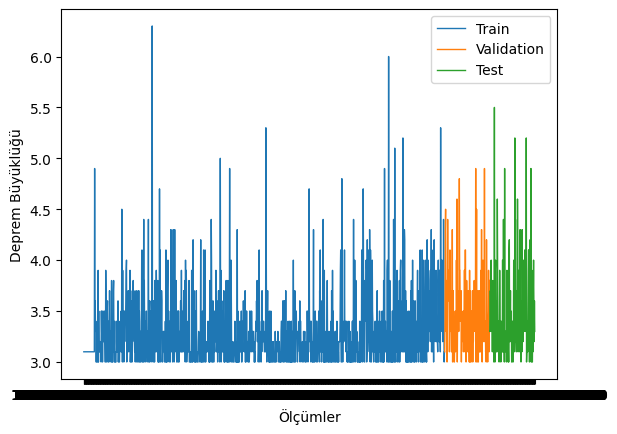

In [32]:
q_80 = int(len(dates) * .8) # train test validation ayrımı 
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train,lw=1)
plt.plot(dates_val, y_val,lw=1)
plt.plot(dates_test, y_test,lw=1)

plt.ylabel('Deprem Büyüklüğü')
plt.xlabel('Ölçümler')

plt.legend(['Train', 'Validation', 'Test'])

plt.show()

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import set_random_seed
from tensorflow.keras.optimizers.legacy import Adam  

model_keras = Sequential()
model_keras.add(Dense(128, input_shape=((3,1)), activation="relu"))
model_keras.add(Dense(64, activation="relu"))
model_keras.add(Dense(32, activation="relu"))
model_keras.add(Dense(16, activation="relu"))
model_keras.add(Dense(8, activation="relu"))
model_keras.add(Dense(1))



model_keras.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])
print(model_keras.summary())

set_random_seed(1)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3, 128)            256       
                                                                 
 dense_1 (Dense)             (None, 3, 64)             8256      
                                                                 
 dense_2 (Dense)             (None, 3, 32)             2080      
                                                                 
 dense_3 (Dense)             (None, 3, 16)             528       
                                                                 
 dense_4 (Dense)             (None, 3, 8)              136       
                                                                 
 dense_5 (Dense)             (None, 3, 1)              9         
                                                                 
Total params: 11,265
Trainable params: 11,265
Non-traina

In [34]:
model_keras.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30,verbose=0)
print(model_keras.evaluate(X_test, y_test)) # Xm 0.39 sapma. 

5/5 [==============================] - 0s 2ms/step - loss: 0.3121 - mean_absolute_error: 0.3877
[0.31208527088165283, 0.3877105414867401]


5/5 [==============================] - 0s 2ms/step


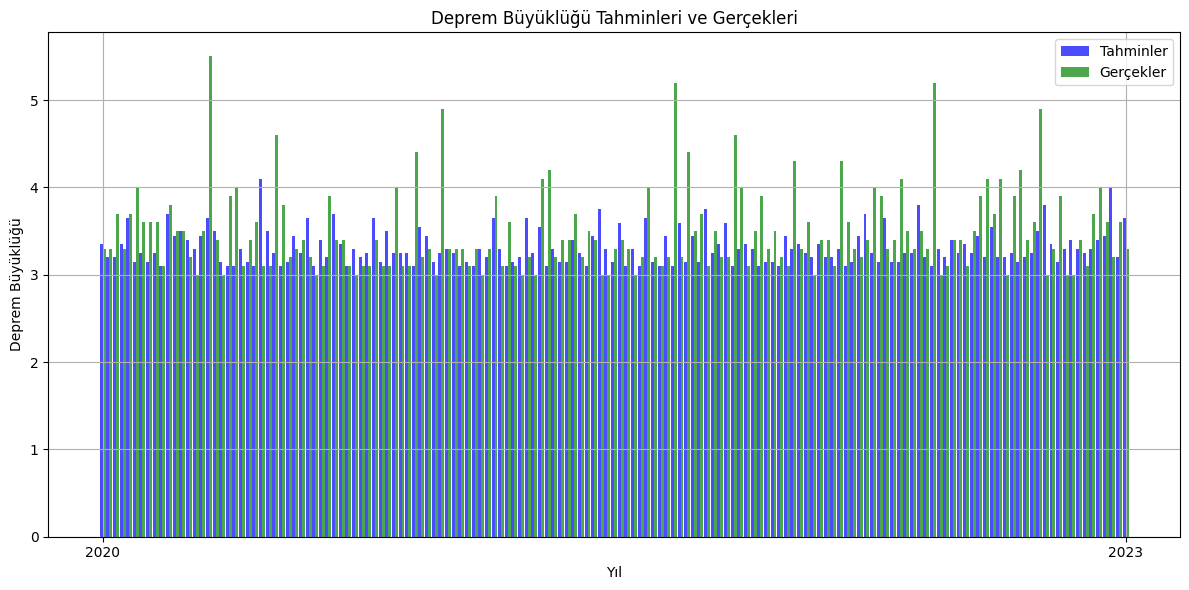

In [35]:
# Tahminlerin ve gerçeklerin boyutları uyumlu hale getirdik.
tahminler = model_keras.predict(X_test).flatten()  # Modelin tahminleri
gercekler = y_test.flatten()  # Gerçek deprem büyüklükleri, tahminlerle aynı boyuta getirildi

tahminler = tahminler[:len(gercekler)]

tarihler = dates_test[:len(gercekler)]

# Tarihleri yıl olarak dönüştürün
yil_tarihler = [pd.Timestamp(tarih).year for tarih in pd.to_datetime(tarihler)]

# Bar genişliği ayarları
bar_genislik = 0.45
indeksler = np.arange(len(yil_tarihler))


plt.figure(figsize=(12, 6))
plt.bar(indeksler - bar_genislik/2, tahminler[:len(tarihler)], label='Tahminler', width=bar_genislik, color='blue', alpha=0.7)
plt.bar(indeksler + bar_genislik/2, gercekler[:len(tarihler)], label='Gerçekler', width=bar_genislik, color='green', alpha=0.7)

plt.xlabel('Yıl')
plt.ylabel('Deprem Büyüklüğü')
plt.title('Deprem Büyüklüğü Tahminleri ve Gerçekleri')
plt.legend()
plt.grid(True)

plt.xticks([indeksler[0], indeksler[-1]], [yil_tarihler[0], yil_tarihler[-1]])

plt.tight_layout()
plt.show()

# **Başlangıç Seviye Sorular**

In [36]:
#Veri setinde kaç tane deprem kaydı bulunmaktadır?

num_earthquakes = len(data)

print("Toplam deprem sayısı:", num_earthquakes)


Toplam deprem sayısı: 50000


In [37]:
#En büyük magnitüde sahip deprem hangisidir?

max_magnitude_earthquake = data[data['xM'] == data['xM'].max()]

print("En büyük magnitüde sahip deprem:")
print(max_magnitude_earthquake)

En büyük magnitüde sahip deprem:
            No         Deprem Kodu  Olus zamani  Enlem  Boylam  Der(km)    xM    MD    ML    Mw    Ms    Mb Tip                                                Yer     Koordinatlar
2023-02-06    3766  20230206011732  01:17:32.67 37.176  37.085    5.500 7.700 0.000 7.500 7.700 0.000 0.000  Ke  YAMACOBA-SEHITKAMIL (GAZIANTEP) [North West  0...  37.1757, 37.085


In [38]:
#En düşük büyüklüğe sahip deprem hangisidir?

min_magnitude = data['xM'].min()
print("En küçük magnitüde sahip deprem:")
print(min_magnitude)


En küçük magnitüde sahip deprem:
3.0


In [39]:
#Büyüklüğü 7'nin üzerinde olan kaç tane deprem kaydedilmiştir?
num_large_earthquakes = data[data['xM'] > 7].shape[0]
print(f"Büyüklüğü 7'nin üzerinde olan {num_large_earthquakes} tane deprem kaydedilmiştir.")

Büyüklüğü 7'nin üzerinde olan 5 tane deprem kaydedilmiştir.


# **Orta Seviyeli Sorular**

In [40]:
#Büyüklüğü 6'nın üzerinde olan depremlerin ortalama büyüklüğü nedir?
avg_magnitude_over_6 = data[data['xM'] > 6]['xM'].mean()
print(f"Büyüklüğü 6'nın üzerinde olan depremlerin ortalama büyüklüğü {avg_magnitude_over_6}.")

Büyüklüğü 6'nın üzerinde olan depremlerin ortalama büyüklüğü 6.595454545454545.


In [41]:
#Büyüklüğü 5 ve altında olan depremlerin ortalama büyüklüğü nedir?
avg_magnitude_under_5 = data[data['xM'] <= 5]['xM'].mean()
print(f"Büyüklüğü 5 ve altında olan depremlerin ortalama büyüklüğü {avg_magnitude_under_5}.")

Büyüklüğü 5 ve altında olan depremlerin ortalama büyüklüğü 3.332931096898757.


In [42]:
# Büyüklüğü 5 ve altında olan depremlerin sayısını hesapla
num_earthquakes_under_5 = data[data['xM'] <= 5].shape[0]

print(f"Büyüklüğü 5 ve altında olan {num_earthquakes_under_5} tane deprem kaydedilmiştir.")

Büyüklüğü 5 ve altında olan 49722 tane deprem kaydedilmiştir.


In [43]:
# Büyüklüğü 3 ve altında olan depremlerin sayısını hesapla
num_earthquakes_under_3 = data[data['xM'] <= 5].shape[0]

print(f"Büyüklüğü 3 ve altında olan {num_earthquakes_under_3} tane deprem kaydedilmiştir.")

Büyüklüğü 3 ve altında olan 49722 tane deprem kaydedilmiştir.


# **Zor Seviyeli Sorular**

In [44]:
#Büyüklüğü 6'nın üzerinde olan depremlerin standart sapması nedir?
std_dev_over_6 = data[data['xM'] > 6]['xM'].std()
print(f"Büyüklüğü 6'nın üzerinde olan depremlerin standart sapması {std_dev_over_6}.")

Büyüklüğü 6'nın üzerinde olan depremlerin standart sapması 0.5122102179372328.


In [45]:
#Büyüklüğü 5 ve altında olan depremlerin standart sapması nedir?
std_dev_under_5 = data[data['xM'] <= 5]['xM'].std()
print(f"Büyüklüğü 5 ve altında olan depremlerin standart sapması {std_dev_under_5}.")

Büyüklüğü 5 ve altında olan depremlerin standart sapması 0.3619683273567067.


In [46]:
#Büyüklüğü 6'nın üzerinde olan depremlerin medyanı nedir?
median_over_6 = data[data['xM'] > 6]['xM'].median()
print(f"Büyüklüğü 6'nın üzerinde olan depremlerin medyanı {median_over_6}.")

Büyüklüğü 6'nın üzerinde olan depremlerin medyanı 6.4.


In [47]:
#: Büyüklüğü 5 ve altında olan depremlerin medyanı nedir?
median_under_5 = data[data['xM'] <= 5]['xM'].median()
print(f"Büyüklüğü 5 ve altında olan depremlerin medyanı {median_under_5}.")

Büyüklüğü 5 ve altında olan depremlerin medyanı 3.2.
